# Worksheet 18

Name:  Hemant Kumar Singh  
UID: U17284611

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3125
[1, 0, 1, 0, 0]
0.3125


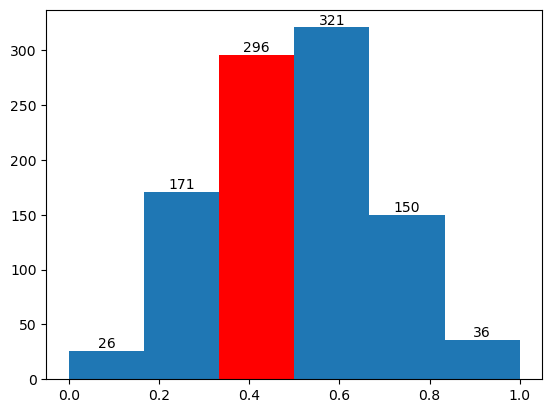

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

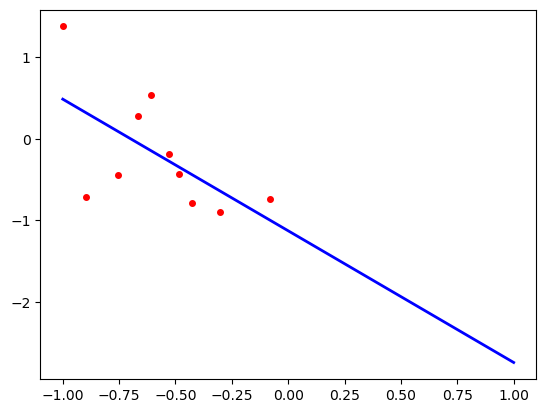

In [21]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
y = np.random.randn(SAMPLE_SIZE)

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y

xplot = np.linspace(-1,1,20)
yestplot = beta[0] + beta[1]*xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, y,'ro',markersize=4)
plt.show()


c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

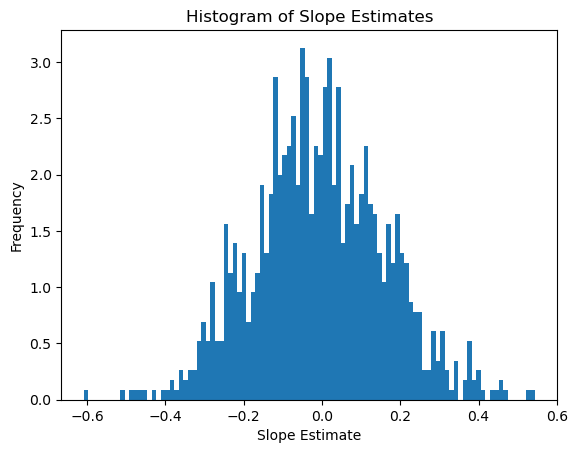

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Set the sample size
SAMPLE_SIZE = 100

# Initialize an empty list to store the slope estimates
beta_hist = []

# Generate 1000 independent datasets
for i in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = np.random.randn(SAMPLE_SIZE)
    
    # Compute the slope estimate
    X = np.vstack((np.ones(SAMPLE_SIZE), xlin)).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    slope = beta[1]
    
    # Append the slope estimate to the list
    beta_hist.append(slope)

# Plot a histogram of the slope estimates
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.set_xlabel('Slope Estimate')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Slope Estimates')
plt.show()


As we increase the sample size, the histogram becomes more narrowly distributed around the true value of the slope, which is 0 in this case. This means that with larger sample sizes, the estimates become more accurate and less variable.

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

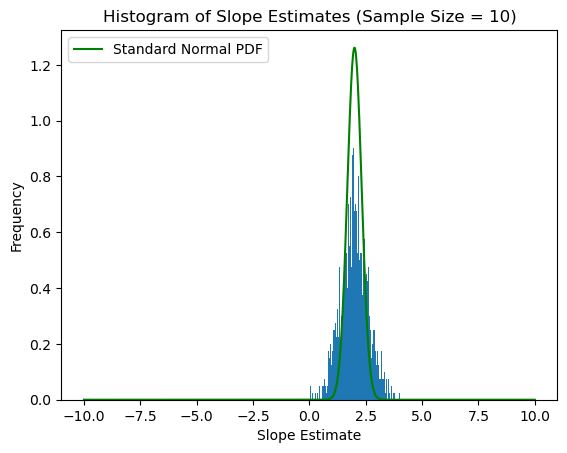

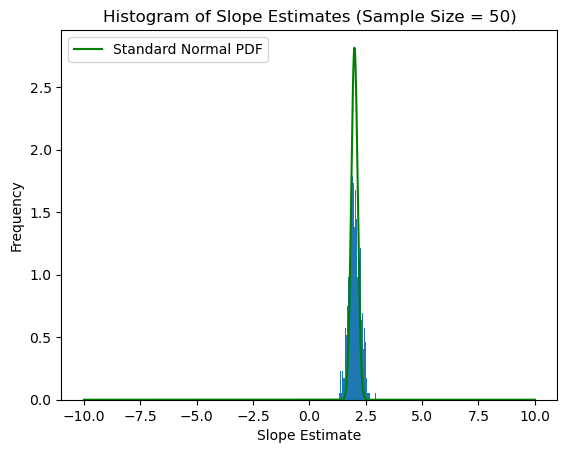

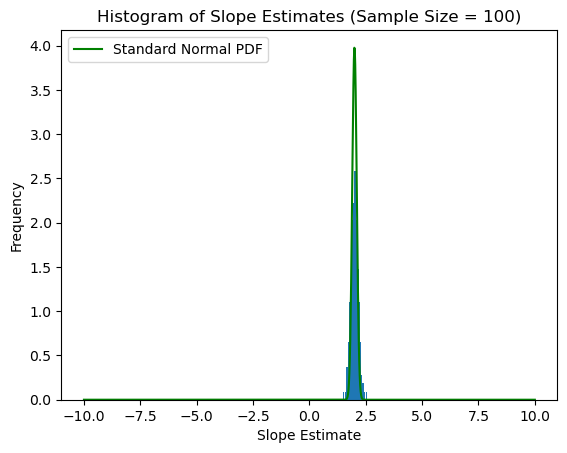

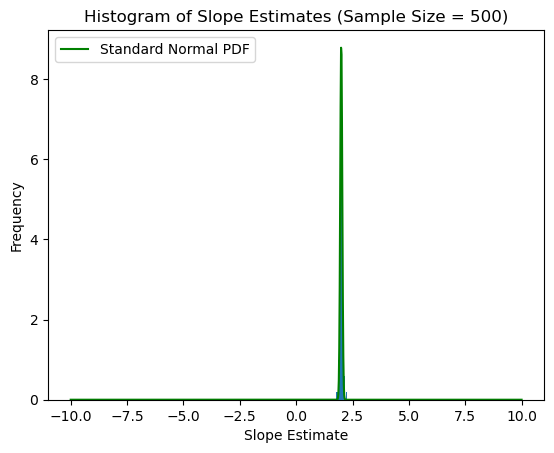

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the true slope value
TRUE_SLOPE = 2

# Set the sample sizes to test
SAMPLE_SIZES = [10, 50, 100, 500]

# Generate histograms for each sample size
for SAMPLE_SIZE in SAMPLE_SIZES:

    # Initialize an empty list to store the slope estimates
    beta_hist = []

    # Generate 1000 independent datasets
    for i in range(1000):
        xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
        y = TRUE_SLOPE * xlin + np.random.randn(SAMPLE_SIZE)

        # Compute the slope estimate
        X = np.vstack((np.ones(SAMPLE_SIZE), xlin)).T
        beta = np.linalg.inv(X.T @ X) @ X.T @ y
        slope = beta[1]

        # Append the slope estimate to the list
        beta_hist.append(slope)

    # Plot a histogram of the slope estimates
    fig, ax = plt.subplots()
    ax.hist(beta_hist, bins=100, density=True)
    ax.set_xlabel('Slope Estimate')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of Slope Estimates (Sample Size = {SAMPLE_SIZE})')

    # Plot the standard normal pdf
    xs = np.linspace(-10, 10, 1000)
    ys = norm.pdf(xs, loc=TRUE_SLOPE, scale=np.sqrt(1/SAMPLE_SIZE))
    ax.plot(xs, ys, color='green', label='Standard Normal PDF')
    ax.legend()

    plt.show()


e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

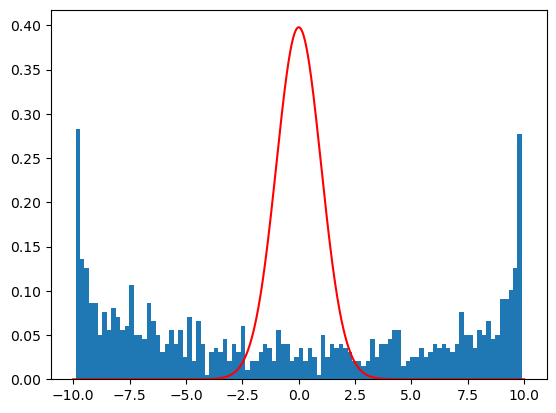

In [9]:
from scipy.stats import t

def standard_error(ytrue, ypred):
    rss = ytrue.T @ ypred
    #print(rss)
    return np.sqrt(rss/(len(ytrue) - 2))

beta_hist = []
for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    yest = beta[0] + beta[1] * xlin
    std = standard_error(y , yest)
    Sk = np.linalg.inv(X.T @ X)
    beta_hist.append(beta[1]/np.sqrt(std**2 * Sk[1][1]))

xs = np.linspace(-10,10,1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - 2), color='red')
plt.show()

f) You are given the following dataset:

[0.50155603 1.19902827]


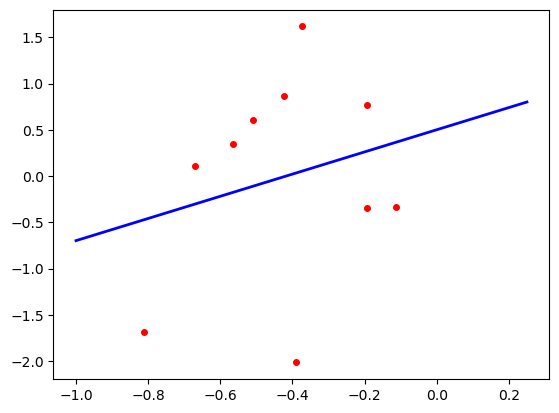

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [7]:
import numpy as np
from scipy.stats import t

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

# Compute the slope estimate
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Compute the standard error
y_pred = X @ beta_hat
RSS = np.sum((y - y_pred)**2)
n = len(y)
p = 2
s = np.sqrt(RSS / (n - p))

# Compute the t-statistic and p-value
t_stat = beta_hat[1] / (s / np.sqrt(n - p))
p_value = 2 * t.sf(np.abs(t_stat), n - p)

print('Slope estimate:', beta_hat[1])
print('Standard error:', s)
print('t-statistic:', t_stat)
print('p-value:', p_value)


Slope estimate: 1.1990282719906171
Standard error: 1.1699433922245908
t-statistic: 2.898742033481893
p-value: 0.0199301117721563


The probability of observing a dataset at least as extreme as the given one, assuming $\beta = 0$, is given by the calculated p-value.

Given the dataset and the calculated p-value, we can now proceed to make a decision based on the significance level we choose. A common choice for the significance level is 0.05. If the p-value is less than the significance level, we can reject the null hypothesis that $\beta = 0$ and conclude that there is a significant relationship between the variables.

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))


0.9932075208241693
0.9932361910279861
0.9936640078088664
0.9936985580525569
0.9937615631964777
0.9937853040039203
0.9937994378883774
0.9938055030976364
0.9938287370268541
0.9938288086154086
0.994004854240244
0.9940074087502109
0.9940084140480673
0.9939570574398194
